# Introduction: Biodiversity Analysis

In this project we'll interpret data from National Parks about endangered species in different parks. We will look at the conservation status of some species and try to find patterns as to why some species are endangered. The questions we'll be answering are:
<br>
- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- What is the distribution of observations for species in different parks?
- Which animal is most prevalent and what is their distribution amongst parks?


## Project scoping 

Whenever performing a data analysis it's important to scope the project in order to get a good grasp of our project goals, analysis and data. Our project goals are simply the main reason we're performing this analysis in the first place and our analysis is simply how we look at our data and extract useful insights that will help better our situation and as for our data it's what we're performing the analysis on provided by (hopefully) reliable sources. 

#### Project Goals
The goal of this project is to interprete data from National parks about endangered species in different parks. This is so that we can tell the park managers what the status of their parks are in terms of species that are endangered and help suggest solutions to better cater for them. 

#### Analysis
Here we'll analyse, clean, visualize and draw insightful conclusions on the data, when analysing we'll focus mainly on endangered species in different categories and see if there are any patterns as to why they are endangered.

#### Data
This data is provided by [Codecademy]("https://codecademy.com"), although it's fictional, it's inspired by real life data. This data consist of 2 csv file `species.csv` and `observation.csv` the `species.csv` data has 5824 rows and 4 columns (variables):


- category: The category of the species
- scientific_name: The scientific or botanical names of the species
- common_names: The common names of the species
- conservation_status: The level of conservation of the species

while our `observation.csv` has 23296 rows and 3 columns (variables)

- scientific_name: The scientific or botanical name of the species
- park_name: The name of the park which the species was sighted
- observations: The number of observations within the last seven days


Now that we have our scope defined let's start by importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Load the data using `.read_csv` in the pandas library

In [2]:
observation = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

### EDA

In [3]:
print(f"The shape of observation.csv: {observation.shape[0]} rows and {observation.shape[1]} columns")
observation.head()

The shape of observation.csv: 23296 rows and 3 columns


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
print(f"The shape of species.csv: {species.shape[0]} rows and {species.shape[1]} columns")
species.head()

The shape of species.csv: 5824 rows and 4 columns


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


Let's use the `.describe` function to get a five number summary of our data

In [5]:
# species.csv
species.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [6]:
observation.describe(include="all")

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


Let's check for duplicate rows and drop them if there are any

In [7]:
species.duplicated().sum()

0

In [8]:
observation.duplicated().sum()

15

In [9]:
observation.drop_duplicates(inplace=True)

In our `species.csv` all columns seem to have no missing data except for `conservation_status` columns which seems to be missing a huge amount of data, and in the `category` column the `Vascular Plant` has the highest occurance above all the category of species.
In our `observation.csv` none of the data seems missing, we're in luck! We can also see that the highest`observations` 321 in a park and I would guess that the species responsible for this the `Vascular Plant` but we can't be sure yet we'll have to find out

### Missing data

In [10]:
observation.isna().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [11]:
print("The percent of missing data in each column:\n")
species.isna().sum() * 100 / len(species)

The percent of missing data in each column:



category                0.000000
scientific_name         0.000000
common_names            0.000000
conservation_status    96.720467
dtype: float64

In [12]:
# let's take a closer look at the "conservation_status" column
print(f"missing: {len(species) - species.conservation_status.count()}")
species.conservation_status.value_counts()

missing: 5633


Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

We can see that the `conservation_status` of this species is either `Species of Concern`, `Endangered`, `Threatened` or `In Recovery` while the rest seems to be missing. Which means they were never looked into whether they were endangered or threatened species of concern and so on. So let's just label them as `Not_concerned`

In [13]:
species.fillna(value={"conservation_status": "Not_concerned"}, inplace=True)

In [14]:
species.head(3)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not_concerned
1,Mammal,Bos bison,"American Bison, Bison",Not_concerned
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not_concerned


### Analysis

What is the distribution of the conservation status for species?<br>
Let's see how many species are in each category

In [15]:
categories = species.category.value_counts()
categories

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

We can see `Vascular Plant` has the highest number of species but what about their `conservation_status`

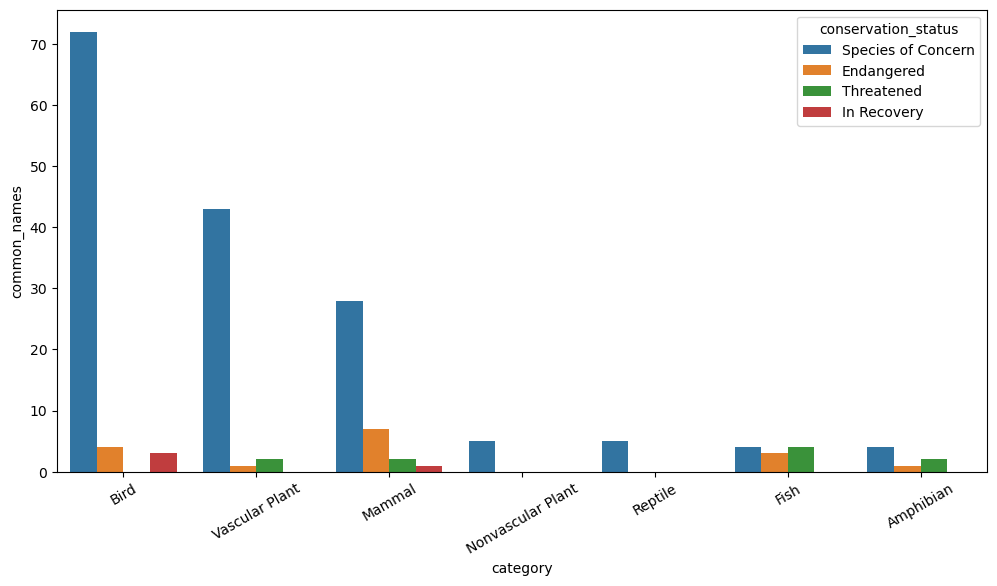

In [16]:
cat_conserve = species[species.conservation_status != "Not_concerned"]\
.groupby(["category", "conservation_status"]).common_names.count()\
.reset_index()\
.sort_values(by="common_names", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=cat_conserve, x="category", y="common_names", hue="conservation_status")
plt.xticks(rotation=30)
plt.show()

The distribution of the `conservation_status` among species is centered around `Bird` being the highest `Species of Concern` followed by `Vascular Plant` then `Mammals` and we can also see that `Bird` and `Mammal` are the most `Endangered` species

Are certain types of species more likely to be endangered? <br>
To determine this we would have to look at the `conservation_status` column for answers, we can assume that some species `conservation_status` were missing due to them never being known and cared about, so we'll create a new column `is_cared` to describe whether or not the species are protected

In [17]:
species['is_cared'] = species.conservation_status != "Not_concerned"
species.head(3)

,category,scientific_name,common_names,conservation_status,is_cared
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not_concerned,False
1,Mammal,Bos bison,"American Bison, Bison",Not_concerned,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not_concerned,False


The next step is to look at the `is_concerned` and group our data by `category` and `is_safe` then count the number of species in each case

In [18]:
species_care = pd.crosstab(species.category, species.is_cared)

species_care = species_care.rename(columns={True:"Yes", False:"No"})

species_care['percent_cared'] = species_care["Yes"] * 100 / species_care.sum(axis=1)

species_care

is_cared,No,Yes,percent_cared
category,,,
Amphibian,73,7,8.750000
Bird,442,79,15.163148
Fish,116,11,8.661417
Mammal,176,38,17.757009
Nonvascular Plant,328,5,1.501502
Reptile,74,5,6.329114
Vascular Plant,4424,46,1.029083


It looks like the park managers really have to sit up on this, in all the category of species only few (not even up to 20%) of each category were taken into consideration, only 1% of `Vascular Plant` were cared for and for `Mammal` only ~18% like wise for `Bird` ~15%. <br>
But for us to know which species is likely to be endangered we have to take into consideration the total number of species in each category, for example we seen only ~1% of `Vascular Plant` are protected but that is because there are a lot of species there, the total number of species cared for is 46 out of 4424, when we compare that to `Fish` which has ~9% of it's species protected we think that `Vascular Plant` is more endangered but in reality `Fish` might be more endangered due to is small number of species over all. To better understand which species is more likely to be endangered we'll look at species that are  `Endangered` and `Threatened`

In [115]:
data = species[species.conservation_status != "Not_concerned"]
species_status = pd.crosstab(data.category, data.conservation_status)
species_status

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1,0,4,2
Bird,4,3,72,0
Fish,3,0,4,4
Mammal,7,1,28,2
Nonvascular Plant,0,0,5,0
Reptile,0,0,5,0
Vascular Plant,1,0,43,2


The more likely endangered species might just be `Mammal` which has the most `Endangered` species or `Fish` which has 3 `Endangered` species and 4 `Threatened` species, and let's not forget that only ~9% of it's species are cared for that's 11 species in absolute numbers whereas for `Mammal` up to 17% are cared for which is up to 38 species in real numbers.

Are the differences between species' conservation status significant? <br>
To answer this question we need to look at just how related the conservation status between categories of species are i.e whether or not they are dependent on each other. So let's calculate the probability of them being independent. 

In [116]:
from scipy.stats import chi2_contingency as ch2

species_status

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1,0,4,2
Bird,4,3,72,0
Fish,3,0,4,4
Mammal,7,1,28,2
Nonvascular Plant,0,0,5,0
Reptile,0,0,5,0
Vascular Plant,1,0,43,2


By using the chi-square contingency function our null hypothesis automatically becomes "The variables are independent", so it will calculate the probability that our null hypothesis is True. Now we need to set a probability treshold, this treshold with tell us whether value is **significant**ly different from our null hypothesis or **not significant**ly different from our null hypothesis, this means that a low propbability is **significant**ly different and a high probability is **not significant**. The standard threshold is `0.05` i.e 5% so we'll stick with it

In [117]:
def cal_prob(data):
    chi_dist, prob, dof, expected = ch2(data)
    return {"chi-square-dist": chi_dist, "probability": prob, "degree_of_freedom": dof, "expected_freq": expected}

mammal_fish1 = cal_prob(species_care.loc[["Mammal", "Fish"], ['No', "Yes"]])

print("species_care df:", mammal_fish1['probability'])


mammal_fish2 = cal_prob(species_status.loc[["Mammal", "Fish"]])

print("species_status df:", mammal_fish2['probability'])


species_care df: 0.031145264082780604
species_status df: 0.027054869392704923


A probability of `0.03` and `0.02` is quite small which means that the probabiliy of the `conservation_status` for `Fish` and `Mammal` beign completely independent is `0.03` (3%) when working with the `is_cared` data (`spcies_care`) and `0.02` for the `species_status` dataset which are both less than `0.05` indicating that value is "significant" enough for us to reject the null hypothesis. Since the probabilty of the variables being independent is so small (3%) let's see what the expected frequencies are when they are independent

In [118]:
expected_fish_mammal = pd.DataFrame(mammal_fish1['expected_freq'], columns=['No', "Yes"], index=['Fish', "Mammal"])

print("expected Data:\n", expected_fish_mammal)
print("real data:\n", species_care.loc[['Fish', "Mammal"]])

expected Data:
                 No        Yes
Fish    183.249267  30.750733
Mammal  108.750733  18.249267
real data:
 is_cared   No  Yes  percent_cared
category                         
Fish      116   11       8.661417
Mammal    176   38      17.757009


In [119]:

expected_fish_mammal2 = pd.DataFrame(data=mammal_fish2['expected_freq'], columns=species_status.columns, index=["Mammal", "Fish"])
print("Expected Data:\n", expected_fish_mammal2)
print("Real Data:\n", species_status.loc[['Mammal', "Fish"]])

Expected Data:
 conservation_status  Endangered  In Recovery  Species of Concern  Threatened
Mammal                 7.755102      0.77551           24.816327    4.653061
Fish                   2.244898      0.22449            7.183673    1.346939
Real Data:
 conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Mammal                        7            1                  28           2
Fish                          3            0                   4           4


Now let's iterate over all the combination of categories for both the datasets `species_care` and `species_status` and print out their probabilities

In [120]:
import itertools

categories = species.category.unique()

pairs = list(itertools.combinations(categories, 2))


probs_cared = []

for i, pair in enumerate(pairs):
    prob1 = cal_prob(species_care.loc[list(pair), ['No', "Yes"]])

    probs_cared.append([pair, prob1["probability"]])

df_col = ['Combinations', "Probability"]
probabilities_cared = pd.DataFrame(probs_cared, columns=df_col)
probabilities_cared.head()

,Combinations,Probability
0,"(Mammal, Bird)",4.459017e-01
1,"(Mammal, Reptile)",2.338465e-02
2,"(Mammal, Amphibian)",8.416929e-02
3,"(Mammal, Fish)",3.114526e-02
4,"(Mammal, Vascular Plant)",1.734911e-70


In [121]:
probs_status = []

# for the species_stat some cells have a value of 0 which will cause an error
# if we try to pass it to the chi2_contingency function. So we add 0.5 to each
# value to avoid the error
example_stat = species_status + 0.5


for i, pair in enumerate(pairs):


    prob2 = cal_prob(example_stat.loc[list(pair)])
    probs_status.append((pair, prob2['probability']))

probabilities_status = pd.DataFrame(probs_status, columns=df_col)
probabilities_status.head()

,Combinations,Probability
0,"(Mammal, Bird)",0.026536
1,"(Mammal, Reptile)",0.876894
2,"(Mammal, Amphibian)",0.271855
3,"(Mammal, Fish)",0.038294
4,"(Mammal, Vascular Plant)",0.073339


In [126]:
probabilities = pd.merge(
    probabilities_cared,
    probabilities_status,
    on="Combinations",
    how="inner",
    suffixes=("_cared", "_status"))
probabilities.head()

,Combinations,Probability_cared,Probability_status
0,"(Mammal, Bird)",4.459017e-01,0.026536
1,"(Mammal, Reptile)",2.338465e-02,0.876894
2,"(Mammal, Amphibian)",8.416929e-02,0.271855
3,"(Mammal, Fish)",3.114526e-02,0.038294
4,"(Mammal, Vascular Plant)",1.734911e-70,0.073339


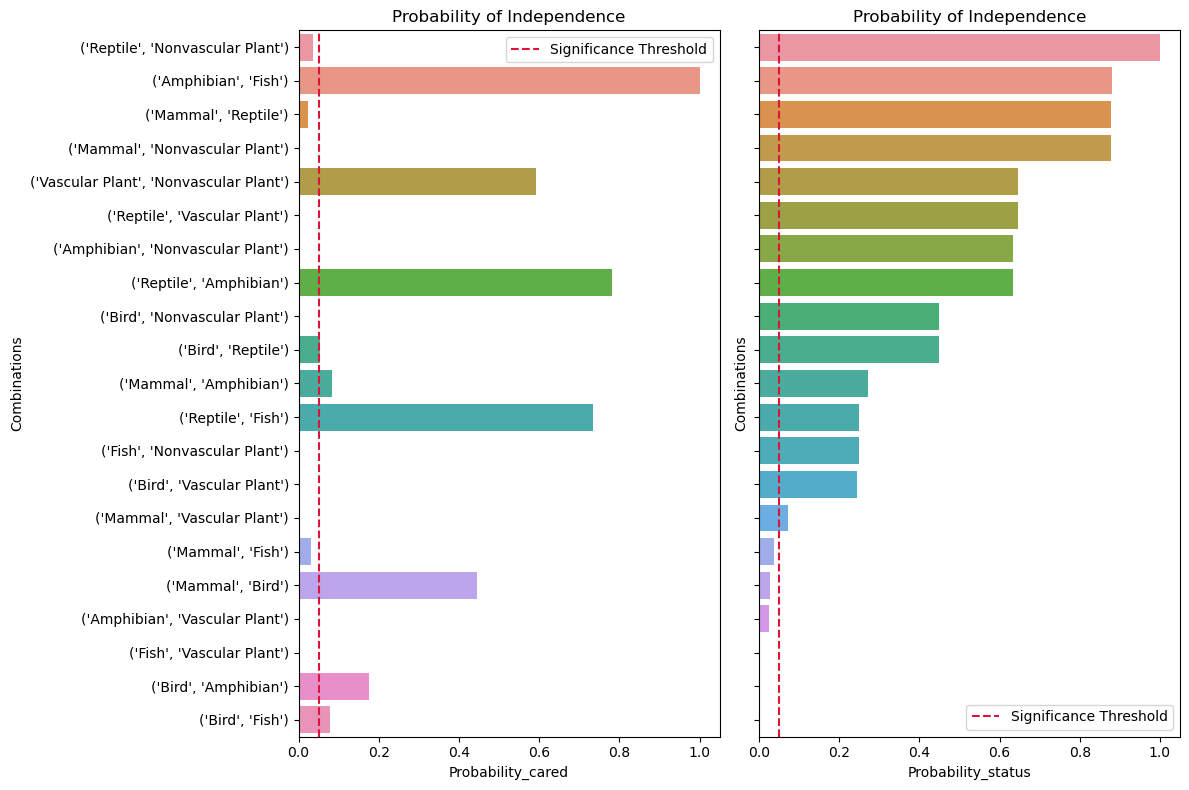

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True)

sns.barplot(data=probabilities.sort_values("Probability_status", ascending=False), y="Combinations", x="Probability_cared", ax=ax[0])
ax[0].set_title("Probability of Independence")
ax[0].axvline(0.05, color="crimson", linestyle="--", label="Significance Threshold")
ax[0].legend()

sns.barplot(data=probabilities.sort_values("Probability_status", ascending=False), y="Combinations", x="Probability_status", ax=ax[1])
ax[1].set_title("Probability of Independence")
ax[1].axvline(0.05, color="crimson", linestyle="--", label="Significance Threshold")
ax[1].legend()

plt.tight_layout()
plt.show()

Here we can see that there more of the species' conservation status are statistically significant when we examine their difference with the `is_cared` variable, on the other hand we see a very different results in terms of the `conservation_status` variable. Let's filter the values and get those that are significant and not significant on both graphs.

In [152]:
data1 = probabilities.loc[(probabilities["Probability_cared"] >= 0.05) & (probabilities["Probability_status"] >= 0.05)]
data1

,Combinations,Probability_cared,Probability_status
2,"(Mammal, Amphibian)",0.084169,0.271855
6,"(Bird, Reptile)",0.053032,0.450031
11,"(Reptile, Amphibian)",0.781340,0.634701
12,"(Reptile, Fish)",0.733518,0.248704
15,"(Amphibian, Fish)",1.000000,0.881129
20,"(Vascular Plant, Nonvascular Plant)",0.593134,0.645081


In [153]:
data2 = probabilities.loc[(probabilities["Probability_cared"] <= 0.05) & (probabilities["Probability_status"] <= 0.05)]
data2

,Combinations,Probability_cared,Probability_status
3,"(Mammal, Fish)",3.114526e-02,0.038294
16,"(Amphibian, Vascular Plant)",4.808330e-09,0.024339
18,"(Fish, Vascular Plant)",3.930722e-13,0.000232


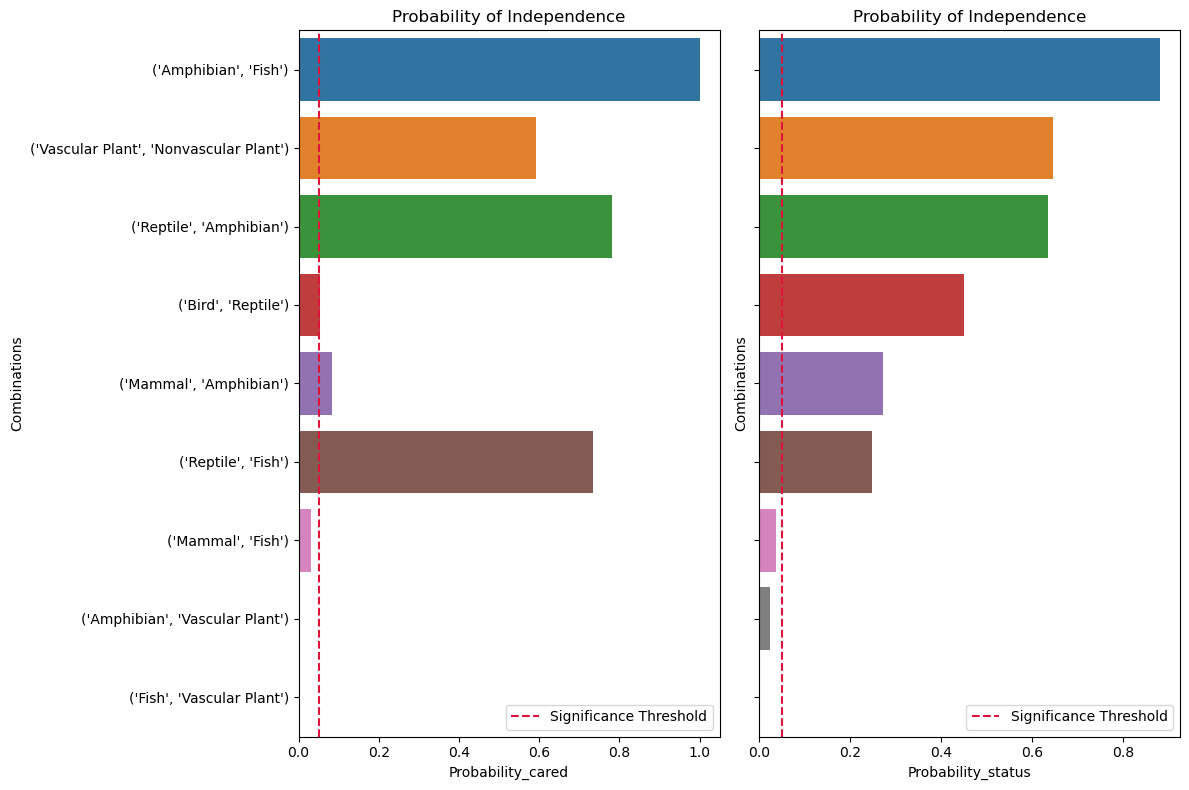

In [156]:
merged = pd.concat([data1, data2], axis=0)

fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True)

sns.barplot(data=merged.sort_values("Probability_status", ascending=False), y="Combinations", x="Probability_cared", ax=ax[0])
ax[0].set_title("Probability of Independence")
ax[0].axvline(0.05, color="crimson", linestyle="--", label="Significance Threshold")
ax[0].legend()

sns.barplot(data=merged.sort_values("Probability_status", ascending=False), y="Combinations", x="Probability_status", ax=ax[1])
ax[1].set_title("Probability of Independence")
ax[1].axvline(0.05, color="crimson", linestyle="--", label="Significance Threshold")
ax[1].legend()

plt.tight_layout()
plt.show()

In the first plot the First graph (on the left) indicates that more groups are dependent on one another, while the last graph (on the right) indicates that only few categories of species are dependent on one another. Either way dependance between species in terms of`conservation_status` could have a positive or negative ecological effect, from our domain knowledge we know that species share a relationship with one another this could be symbiotic (benefit each other) or parasitic (e.g. ticks and cow or pests and plants etc.) or a predator and prey relationship. So if one species was to go extinct it could endanger its predator or some other species that depends on it, if fishes go extinct sea lions would have nothing to feed on. So  Protecting a keystone species, for instance, could have a cascading effect on the ecosystem, potentially safeguarding multiple species. Conversely, endangering a key species could destabilize the ecosystem, putting additional species at risk.

What is the distribution of observation status for species in different parks?<br>
from what we know there are 4 parks `Great Smoky Mountains National Park`, `Yosemite National Park`,`Bryce National Park` and `Yellowstone National Park`

In [ ]:
unique_parks = observation.park_name.unique()

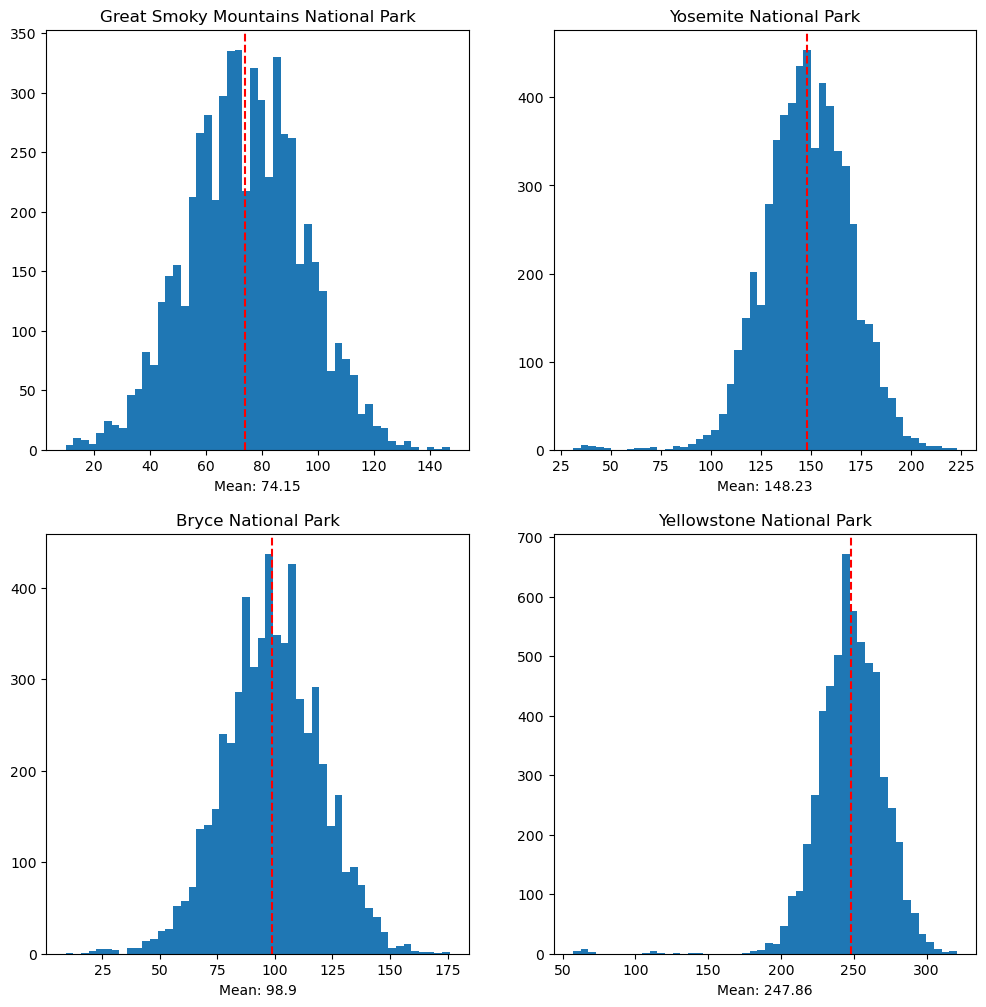

In [ ]:
nrow = 2
ncol = 2

fig, ax = plt.subplots(nrow, ncol, figsize=(12, 12))

i = 0
for r in range(nrow):
    for c in range(ncol):
        data = observation[observation.park_name == unique_parks[i]].observations
        ax[r, c].hist(data, bins=50)
        ax[r, c].axvline(data.mean(), color="red", linestyle="--")
        ax[r, c].set_xlabel(f"Mean: {round(data.mean(), 2)}")
        ax[r, c].set_title(unique_parks[i])
        i+=1

plt.show()

The distributions of `observations` across different parks seem to be normal which indecates nothing unusual although `Yellowstone National Park` seems a little bit left skewed but it didn't affect the mean so it's safe to say it's normal.

Which animal is most prevalent and what is their distribution amongst parks? <br>


In [138]:
import re
import string

def clean_rows(x):
    stripped = re.sub(f"[{string.punctuation}]", "", x)
    cleaned = list(dict.fromkeys(stripped.split()))
    return cleaned


new_names = species[(species.category != "Vascular Plant") & (species.category != "Nonvascular Plant")].common_names.apply(clean_rows)
new_names


0                             [Gappers, RedBacked, Vole]
1                                      [American, Bison]
2       [Aurochs, Domestic, Cattle, Feral, Domesticated]
3                 [Domestic, Sheep, Mouflon, Red, Feral]
4                                      [Wapiti, Or, Elk]
                              ...                       
4610                                          [Hardhead]
4611                            [Sacramento, Pikeminnow]
4612                        [Lahontan, Cutthroat, Trout]
4613                         [California, Golden, Trout]
4614                                   [Riffle, Sculpin]
Name: common_names, Length: 1021, dtype: object

In [139]:
names_list = []

for name in new_names:
    for item in name:
        names_list.append(item)


names_list[:10]

['Gappers',
 'RedBacked',
 'Vole',
 'American',
 'Bison',
 'Aurochs',
 'Domestic',
 'Cattle',
 'Feral',
 'Domesticated']

In [140]:
species_names = pd.Series(names_list, name="Specie_name")
species_names = species_names.value_counts().reset_index().rename(columns={"index": "Specie_name", "Specie_name": "count"})

species_names

,Specie_name,count
0,Warbler,59
1,Northern,53
2,Salamander,41
3,Eastern,39
4,American,37
...,...,...
844,Timber,1
845,Copperhead,1
846,Racerunner,1
847,SixLined,1


We can see that `Warbler` appeared 59 times now lets get the scientific name of this animal, but it having appear this many times means that there must be some varation in `scientific_name` and we are only interested in it's **Genus** and **Species** which every `scientific_name` comprises of the **Genus** is the first name in any scientific name while the **Species** is the second name, other things added just indicate variation, so we'll make a new column called `Botanical_name` unlike `scientific_name` it doesn't indicate variation in species.

In [141]:
botanical = species.scientific_name.str.split(expand=True)
species['Latin_names'] = botanical[0] + " " + botanical[1]



botanical = observation.scientific_name.str.split(expand=True)
observation['Latin_names'] = botanical[0] + " " + botanical[1]
observation.head()

,scientific_name,park_name,observations,Latin_names
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vicia benghalensis
1,Neovison vison,Great Smoky Mountains National Park,77,Neovison vison
2,Prunus subcordata,Yosemite National Park,138,Prunus subcordata
3,Abutilon theophrasti,Bryce National Park,84,Abutilon theophrasti
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Githopsis specularioides


In [142]:
warbler = species[species.common_names.apply(lambda x: "Warbler" in x)]
warbler.head()

,category,scientific_name,common_names,conservation_status,is_cared,Latin_names
90,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,Not_concerned,False,Vermivora pinus
247,Bird,Dendroica caerulescens,Black-Throated Blue Warbler,Not_concerned,False,Dendroica caerulescens
248,Bird,Dendroica castanea,Bay-Breasted Warbler,Not_concerned,False,Dendroica castanea
249,Bird,Dendroica cerulea,Cerulean Warbler,Not_concerned,False,Dendroica cerulea
250,Bird,Dendroica coronata,Yellow-Rumped Warbler,Not_concerned,False,Dendroica coronata


In [143]:
species.head()

,category,scientific_name,common_names,conservation_status,is_cared,Latin_names
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not_concerned,False,Clethrionomys gapperi
1,Mammal,Bos bison,"American Bison, Bison",Not_concerned,False,Bos bison
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not_concerned,False,Bos taurus
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not_concerned,False,Ovis aries
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not_concerned,False,Cervus elaphus


In [147]:
warbler_species = warbler.Latin_names.unique()

obser_list = []
for specie in warbler_species:
    data = observation[observation.Latin_names == specie]
    obser_list.append(data)

warbler_obser = pd.concat(obser_list)

In [148]:
warbler_obser = warbler_obser.merge(warbler, on="Latin_names", suffixes=('_ob', "_sp"))
warbler_obser.head()

,scientific_name_ob,park_name,observations,Latin_names,category,scientific_name_sp,common_names,conservation_status,is_cared
0,Vermivora pinus X chrysoptera,Great Smoky Mountains National Park,98,Vermivora pinus,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,Not_concerned,False
1,Vermivora pinus X chrysoptera,Great Smoky Mountains National Park,98,Vermivora pinus,Bird,Vermivora pinus,Blue-Winged Warbler,Not_concerned,False
2,Vermivora pinus X chrysoptera,Yosemite National Park,136,Vermivora pinus,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,Not_concerned,False
3,Vermivora pinus X chrysoptera,Yosemite National Park,136,Vermivora pinus,Bird,Vermivora pinus,Blue-Winged Warbler,Not_concerned,False
4,Vermivora pinus,Great Smoky Mountains National Park,80,Vermivora pinus,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,Not_concerned,False


In [149]:
obser_freq = warbler_obser.groupby(["park_name", "is_cared"]).observations.sum().sort_values(ascending=False).reset_index()
obser_freq

,park_name,is_cared,observations
0,Yellowstone National Park,False,15977
1,Yosemite National Park,False,9651
2,Bryce National Park,False,6476
3,Great Smoky Mountains National Park,False,4946
4,Yellowstone National Park,True,492
5,Yosemite National Park,True,271
6,Bryce National Park,True,195
7,Great Smoky Mountains National Park,True,145


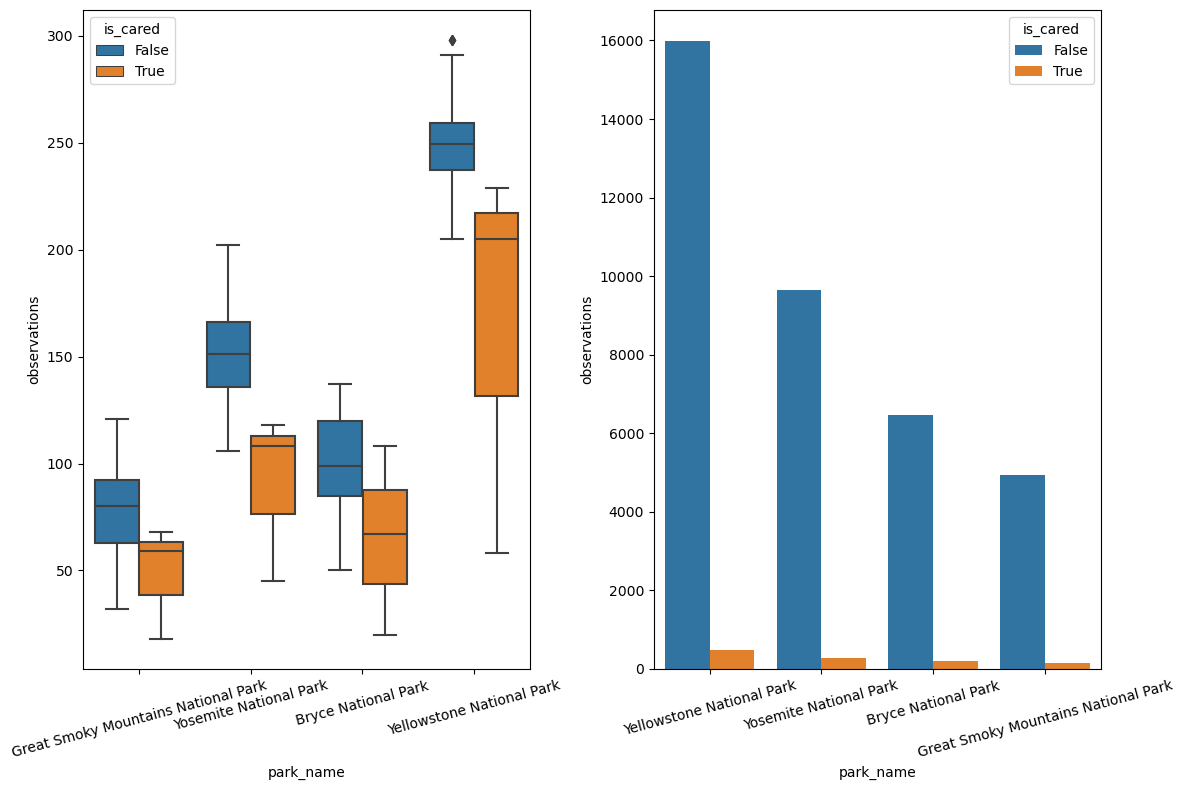

In [150]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.boxplot(data=warbler_obser, x="park_name", y='observations', hue="is_cared")
plt.xticks(rotation=15)

plt.subplot(1, 2, 2)
sns.barplot(data=obser_freq, x="park_name", y="observations", hue="is_cared")
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

The distribution of the `Warbler` bird seem normal for most parks but a bit skewed in `Yellowstone National park` this is due to a significantly low observation of the bird in the park. The fact that a many of these warbler birds are not protected is concerning and could mean that this bird might just be endangered.

# Conclusion
We have finally managed to finish analyzing our data and answer the questions we had in the begining of the project:<br>

- What is the distribution of conservation status for species?
    - The distribution seems to be centered around the `Bird` category being largest `Species of concern`

- What is the distribution of observations for species in different parks?
    - Mostly normal with `Yellowstone National Park` having the highest average of 247 observations in the last 7 days

- Are certain types of species more likely to be endangered?
    - Species that are more likely to be endangered are `Vascular Plant`, `Nonvascular Plant`, `Reptile`,`Fish` and `Amphibian` due to their low proportion of protection

- Are the differences between species and their conservation status significant?
    - More species have significant differences in their conservation status while other don't.

- Which animal is most prevalent and what is their distribution amongst parks?
    - The most prevalant animal would be the `Warbler` bird and it's mostly found on the `Yellowstone National park`


## Futher insights

This data only consist of entries for the past 7 days. Our analysis have revealed some disturbing information about species and how most of them are not protected, our park managers need to really sit up on this, although we don't know who or how the data was collect and exactly why there were a lot of missing entries in the `conservation_status` column in the species dataset. <br><br>
It is worth noting that the proportion of the protected species is alarming, none of the categories of species have more than 17% of it's species protected and what might make it worse is that more species are dependent on one another so endangering a keystone specie could affect the biodiversity of others. <br><br>
Check out the presentation by click [here](https://1drv.ms/p/s!AmonO_OaXc0nggYueiRUXzul6mWd?e=yxbN19)